# Embedding in $d=2$ (two patterns)

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import matplotlib.pyplot as plt, matplotlib.animation as animation, matplotlib.tri as tri
import numpy as np
from neurodyn import *
from utils import *

In [3]:
F, G = make_F_G_valentin(p=2, N=100_000, phi=sigmoid)
phi = sigmoid
I_ext = lambda t: 0

In [4]:
rnn = LowRankRNN(F, G, phi, I_ext)

## Test for stationary points

With p=2, the distribution is a lot more wide

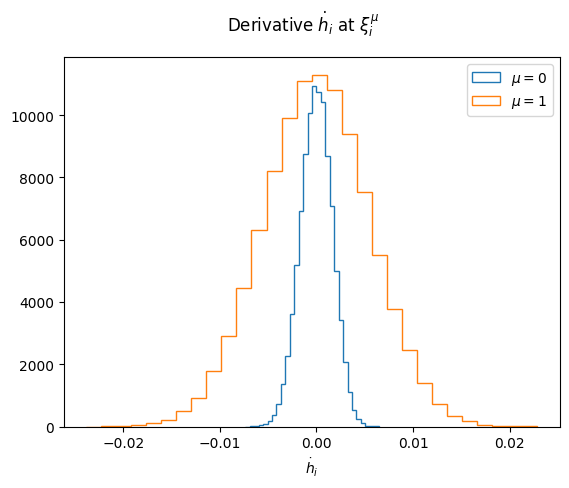

In [5]:
plot_dh_hist(rnn);

## Run simulations and overlap

simulation time: 100.00%|██████████| t=40.000 of 40 [00:07<00:00]


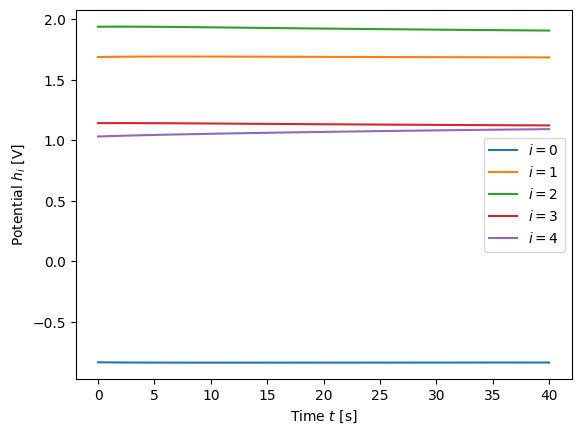

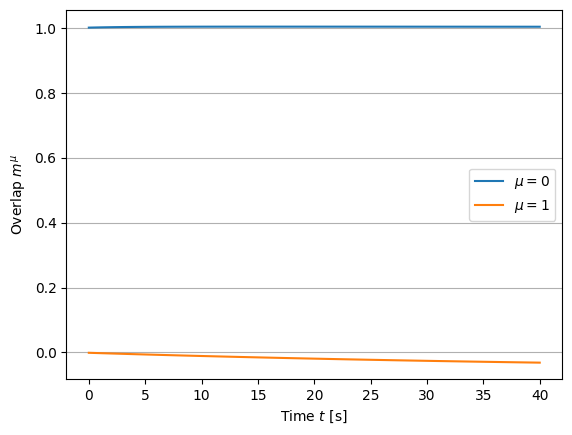

In [9]:
# all neurons in pattern 0
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:09<00:00]


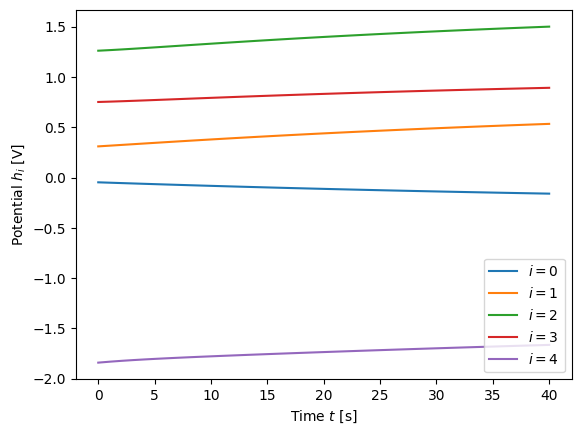

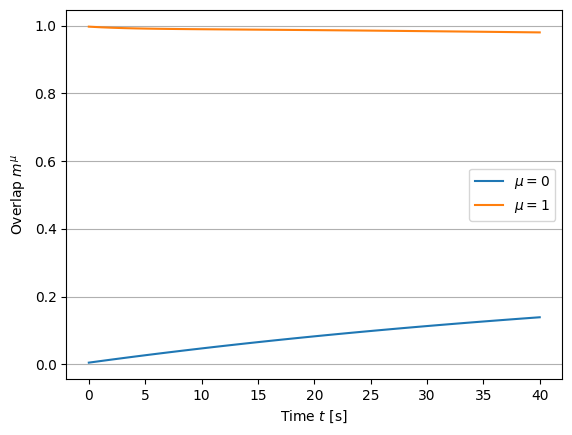

In [8]:
# all neurons in pattern 1
res = rnn.simulate_h(rnn.F[:, 1], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=120.000 of 120 [00:12<00:00]


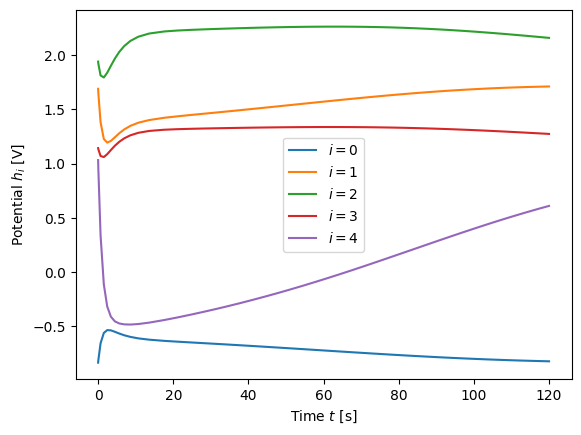

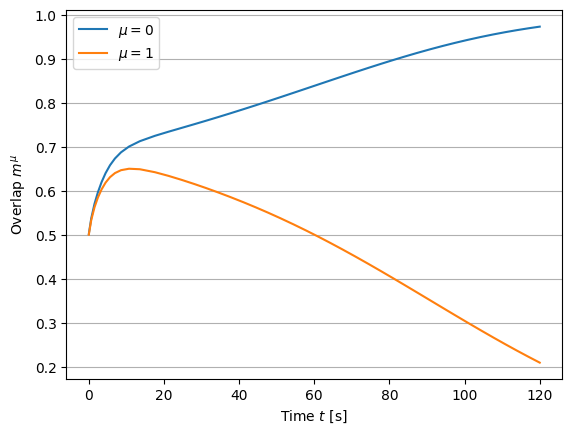

In [ ]:
# half neurons in pattern 0, half neurons in pattern 1
res = rnn.simulate_h(np.concatenate([rnn.F[:rnn.N//2, 0], rnn.F[rnn.N//2:, 1]]), (0, 120), dt_max=5, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);
# hypothesis : mu = 0 "wins" because its dh(xi) histogram is a lot tighter

simulation time: 100.00%|██████████| t=40.000 of 40 [00:11<00:00]


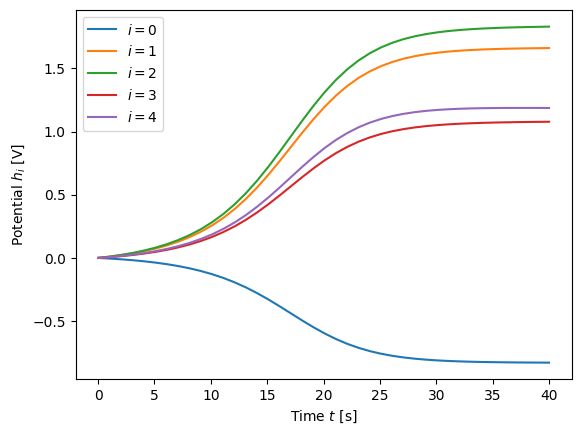

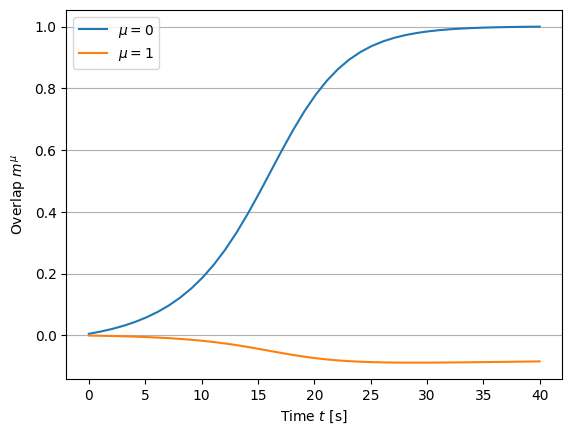

In [22]:
# starting from 0
res = rnn.simulate_h(np.zeros(rnn.N), (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

## Plot 2D embedding

### verify $\xi$ distribution

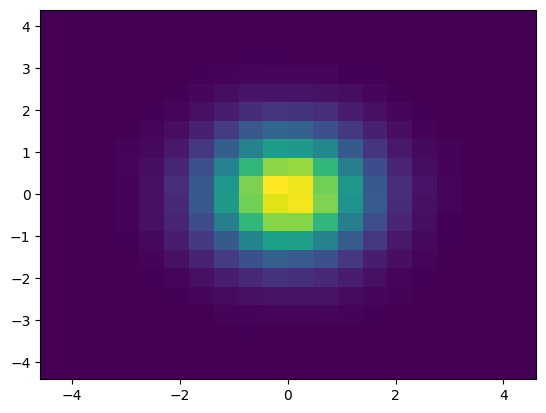

In [73]:
# quickly verify distribution of xi
plt.hist2d(rnn.F[:, 0], rnn.F[:, 1], bins=20);

### 2d color plots

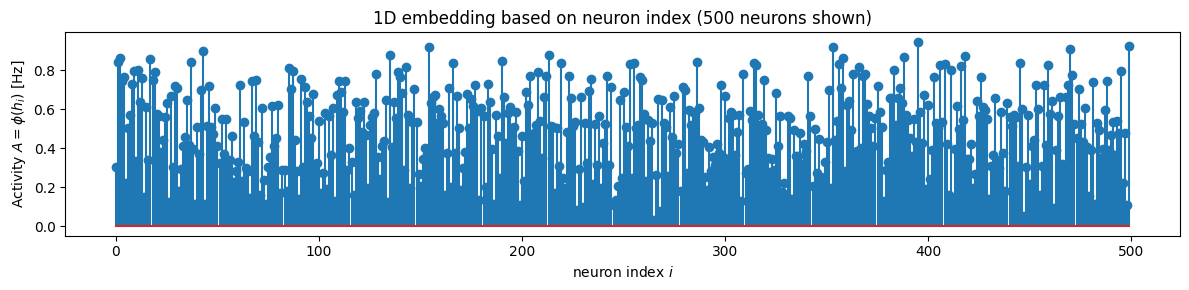

In [92]:
t = -1
Nmax = 500

plt.close('all')
fig, ax = plt.subplots(tight_layout=True, figsize=(12, 3))

ax.set_title('1D embedding based on neuron index (500 neurons shown)')
ax.stem(np.arange(len(res.y[:Nmax, t])), rnn.phi(res.y[:Nmax, t]))
ax.set_xlabel('neuron index $i$')
ax.set_ylabel('Activity $A = \\phi(h_i)$ [Hz]')

plt.show()

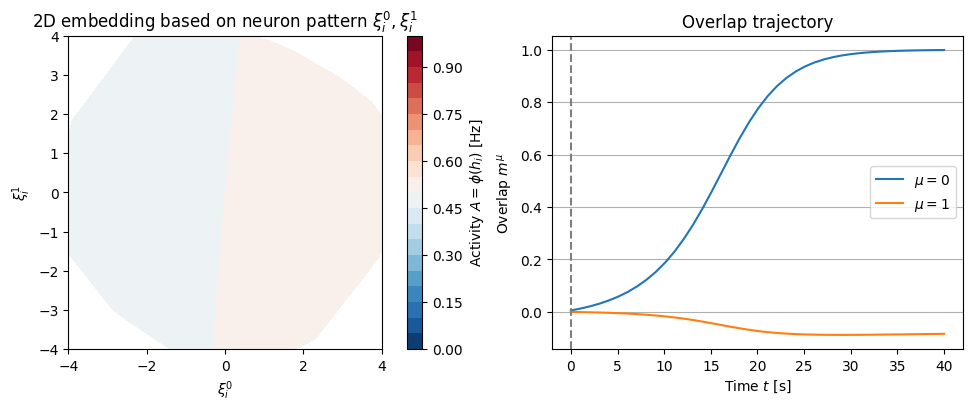

In [109]:
activity = phi(res.y)
idt = 3

plt.close('all')
fig, (ax, axm) = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True)

contour = ax.tricontourf(rnn.F[:, 0], rnn.F[:, 1], activity[:, idt], levels=np.linspace(0, 1, 20+1), cmap='RdBu_r')
cbar = fig.colorbar(contour, ax=ax, label='Activity $A = \\phi(h_i)$ [Hz]')

ax.set_title('2D embedding based on neuron pattern $\\xi_i^0,\\xi_i^1$')
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_aspect('equal')

plot_overlap_trajectory(rnn, res, figax=(fig, axm))
axm.axvline(res.t[idt], color='tab:gray', linestyle='--')

plt.show()

### animation attempt (WIP)

In [103]:
res = rnn.simulate_h(np.zeros(rnn.N), (0, 40), dt_max=1, progress=True)

simulation time: 100.00%|██████████| t=40.000 of 40 [00:16<00:00]


In [118]:
activity = phi(res.y)
idt = 0

plt.close('all')
fig, (ax, axm) = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True)

contour = ax.tricontourf(rnn.F[:, 0], rnn.F[:, 1], activity[:, idt], levels=np.linspace(0, 1, 20+1), cmap='RdBu_r')
# contour = ax.tricontourf(rnn.F[:, 0], rnn.F[:, 1], activity[:, idt], levels=20, vmin=0, vmax=1, cmap='RdBu_r')
cbar = fig.colorbar(contour, ax=ax, label='Activity $A = \\phi(h_i)$ [Hz]')

ax.set_title('2D embedding based on neuron pattern $\\xi_i^0,\\xi_i^1$')
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_aspect('equal')

plot_overlap_trajectory(rnn, res, figax=(fig, axm))
line = axm.axvline(res.t[idt], color='tab:gray', linestyle='--')

def update(idt: int):
	global contour, line  # fuck me lmao
	print(idt)
	for artist in contour.collections:
		artist.remove()
	contour = ax.tricontourf(rnn.F[:, 0], rnn.F[:, 1], activity[:, idt], levels=np.linspace(0, 1, 20+1), cmap='RdBu_r')
	# contour = ax.tricontourf(rnn.F[:, 0], rnn.F[:, 1], activity[:, idt], levels=20, vmin=0, vmax=1, cmap='RdBu_r')
	line.set_xdata([res.t[idt], res.t[idt]])

ani = animation.FuncAnimation(fig, update, frames=range(0, len(res.t), 1))
ani.save('animations/embedding_d=2_h0=0.mp4', writer='ffmpeg', fps=15)

plt.close()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


### plots in 3d (WIP)

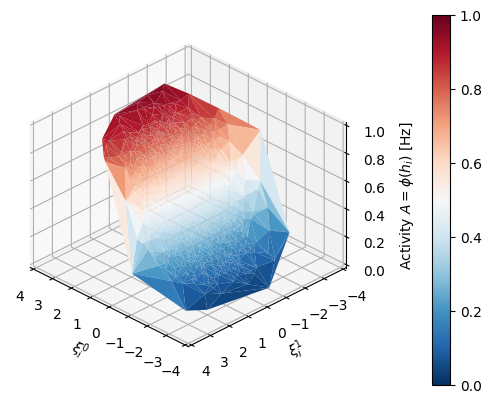

In [85]:
t = 40
activity = phi(res.y)

plt.close('all')
ax = plt.figure().add_subplot(projection='3d')
ax.set_proj_type('ortho')

Nmax = 2000

# trisurf has this annoying transparency artefact...
surf = ax.plot_trisurf(rnn.F[:Nmax, 0], rnn.F[:Nmax, 1], activity[:Nmax, t], alpha=1, cmap='RdBu_r', vmin=0, vmax=1)
cbar = fig.colorbar(surf, ax=ax, pad=0.15)

ax.set_zlim((0, 1))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_zlabel('Activity $A = \\phi(h_i)$ [Hz]')
ax.view_init(azim=180-45)

plt.show(fig)

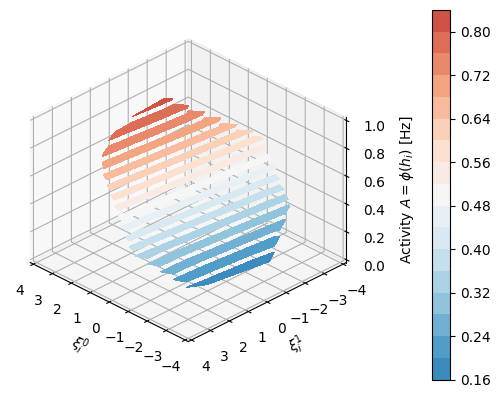

In [50]:
t = 20
activity = phi(res.y)

plt.close('all')
ax = plt.figure().add_subplot(projection='3d')
ax.set_proj_type('ortho')

# tricontourf has this annoying stepwise behavior
surf = ax.tricontourf(rnn.F[:Nmax, 0], rnn.F[:Nmax, 1], activity[:Nmax, t], cmap='RdBu_r', levels=20, vmin=0, vmax=1)
cbar = fig.colorbar(surf, ax=ax, pad=0.15)

ax.set_zlim((0, 1))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_zlabel('Activity $A = \\phi(h_i)$ [Hz]')
ax.view_init(azim=180-45)

plt.show(fig)

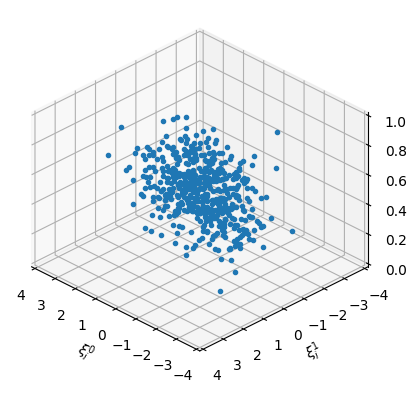

In [87]:
t = 20
Nmax = 512
activity = phi(res.y)

plt.close('all')
ax = plt.figure().add_subplot(projection='3d')
ax.set_proj_type('ortho')

ax.plot(rnn.F[:Nmax, 0], rnn.F[:Nmax, 1], activity[:Nmax, t], '.')

ax.set_zlim((0, 1))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_zlabel('Activity $A = \\phi(h_i)$ [Hz]')
ax.view_init(azim=180-45)

plt.show(fig)